Hi..  This is a combined notebook for the all the code made in the individual assignments of Machine learning by Andrew Ng - Stanford - Coursera

First lets upload the data..  
run below to load the data in 'data' and set basic variables


In [3]:
data=load('ex1data1.txt');
X=data(:,1);
X=(X-mean(X))/std(X);
x=[ones(length(X),1) X];
y=data(:,2);
m=length(X);

Run the below code to define the cost function


In [4]:
%%file costfunc.m
function J=costfunc(x,y,theta)
m=length(y);
h=x*theta;
dif=(h-y).^2;
s=sum(dif);
J=s/(2*m);
end

Created file 'C:\Users\hp\OneDrive\Desktop\cs\ml\costfunc.m'.


In [5]:
%%file grad_descent.m
function [theta,J_history]=grad_descent(x,y,alpha,iter,theta)
m=length(y);
n=size(x,2);
J_history=zeros(iter,1);

for i=1:iter
dJ=(x*theta-y)/m;
for j=1:n
theta(j)=theta(j)-alpha*(dJ'*x(:,j));
end
J_history(i)=costfunc(x,y,theta);
end



Created file 'C:\Users\hp\OneDrive\Desktop\cs\ml\grad_descent.m'.



theta =

    5.8391
    4.6169




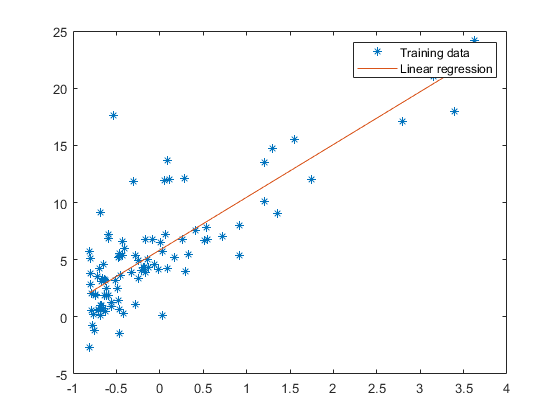

In [10]:
%now choose the alpha and max_iters and initialtheta
alpha=0.01;
iter=1500;
theta=[0;0];
%lets check where are we standing till now
[theta,J_history]= grad_descent(x,y,alpha,iter,theta);
theta
plot(x(:,2),y,'*')
hold on; % keep previous plot visible
plot(x(:,2), x*theta, '-')
legend('Training data', 'Linear regression')
hold off 


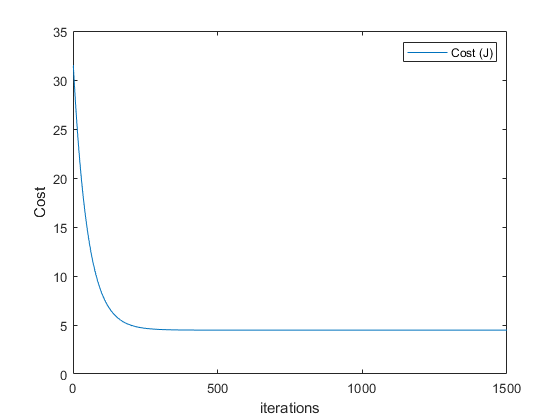

In [11]:
%plotting number of iterations and cost along with it..
%it should decrease with iterations
plot(1:iter,J_history,'-')
xlabel('iterations');
ylabel('Cost');
legend('Cost (J)');

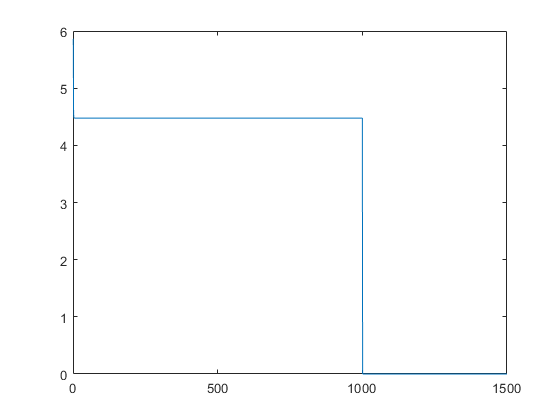

In [12]:
%finding the best alpha
theta=[0;0];
test_J=zeros(iter,1);
alp=linspace(0.001,1,1000);
for i=1:length(alp)
[th,J_his]=grad_descent(x,y,alp(i),iter,theta);
test_J(i)=J_his(iter);
end
plot(1:length(test_J),test_J,'-')

Therefore,we see that this data prefers apha <1 and accordingly with more inspection we can select the apt alpha.

## Normal equation
Use this equation as a one step process to calculate linear gradient

In [7]:
% is the normal equation 
theta=zeros(size(x,2),1);
theta=inv(x'*x)*x'*y


theta =

    5.8391
    4.6169




## Fitlm

In [8]:
data = readtable('ex1data1.txt'); 
linMdl = fitlm(data);
theta = linMdl.Coefficients.Estimate;
theta


theta =

   -3.8958
    1.1930




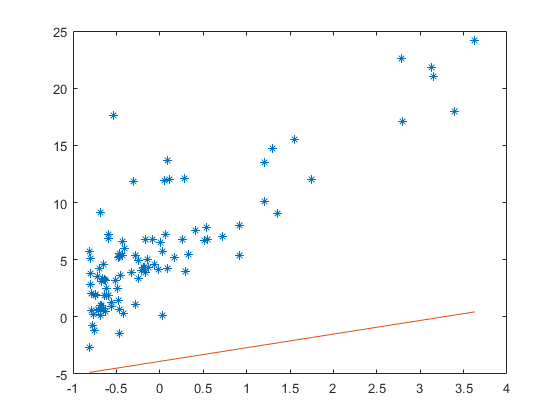

In [9]:
plot(x(:,2),y,'*');
hold on;
plot(x(:,2),x*theta,'-');
hold off;


# Logistic regression


Logistic regression is when y is either 0 or 1  
run below code to load the data


In [166]:
data=load('ex2data1.txt');
data2=load('ex2data2.txt');
X=data(:,1:(size(data,2)-1));
%X=(X-mean(X))./std(X);
x=[ones(length(X),1) X];
y=data(:,size(data,2));


Run the below code to see how the data looks

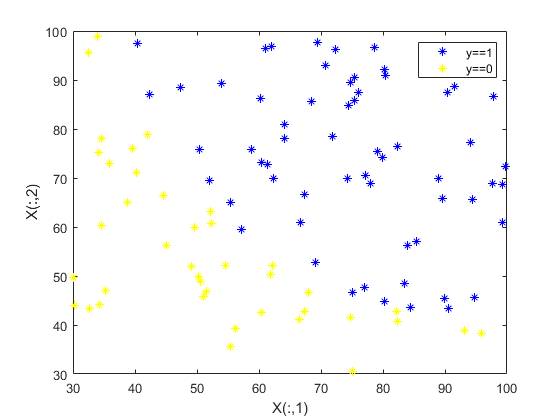

In [107]:
% lets see how the data looks
a=X(:,1);
b=X(:,2);

plot(a(y==1),b(y==1),'b*')
hold on;
plot(a(y==0),b(y==0),'y*')
legend('y==1','y==0');
xlabel('X(:,1)');
ylabel('X(:,2)');

Below is the cost function and its gradient for logistic regression....
But first comes sigmoid function

In [49]:
%%file sigmoid.m
function g=sigmoid(x)
g=zeros(size(x));
g=1./(exp(-x)+1);
end

Created file 'C:\Users\hp\OneDrive\Desktop\cs\ml\sigmoid.m'.


In [113]:
%%file log_costfunc.m
function [J,grad]=log_costfunc(x,y,theta,lambda)
m=length(y);
grad=zeros(size(theta));
J=0;
a=-(sum(y.*log(sigmoid(x*theta))+(1-y).*(log(1-sigmoid(x*theta)) )  )   )/m;
reg=sum(theta(2:length(theta),:).^2)*lambda/(2*m);
J=a+reg;
grad=x'*(sigmoid(x*theta)-y)/m + lambda*[0;theta(2:length(theta),:)]/m;
end



Created file 'C:\Users\hp\OneDrive\Desktop\cs\ml\log_costfunc.m'.


In [115]:
theta=[-24;0.2;0.2];
theta0=[0;0;0];
lambda=0;
[J,grad]=log_costfunc(x,y,theta,lambda)


J =

    0.2183


grad =

    0.0429
    2.5662
    2.6468




### Fminunc

when we write f=@(x)x^2+5*X+3 is a function which takes x and outputs the eq.  
ex:- f(0)=3  
fminunc takes the first input as a function and second a value of x around which it has to find the minimum.  
now ...
options = optimset or optimoptions ??   
well optimoptions first input is the solver... like optimoptions(@fminunc..)  
while in optimset has no need to mention solver  


In [117]:
iter=400;
lambda=0;
theta=[-24;0.2;0.2];
theta0=[0;0;0];
options=optimoptions(@fminunc,'GradObj','on','MaxIter',iter);
[theta_fmin,cost]=fminunc(@(t)log_costfunc(x,y,t,lambda),theta0,options);
theta_fmin


Local minimum found.

Optimization completed because the size of the gradient is less than
the value of the optimality tolerance.


theta_fmin =

  -25.1613
    0.2062
    0.2015




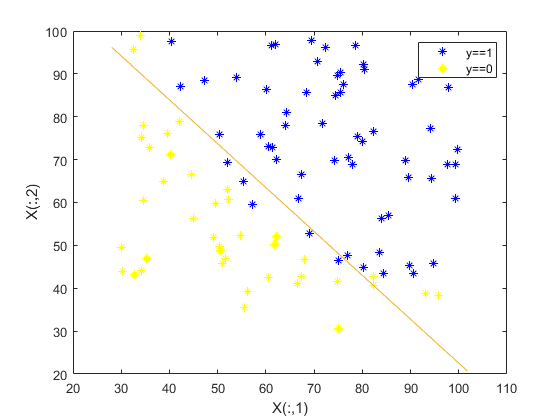

In [134]:
%seeing what we got till now
a=X(:,1);
b=X(:,2);
h=sigmoid(x*theta);

plot(a(y==1),b(y==1),'b*')
hold on;
plot(a(y==0),b(y==0),'y*')
hold on;
plot_x = [min(x(:,2))-2,  max(x(:,2))+2];
plot_y = (-1/theta_fmin(3))*(theta_fmin(2)*plot_x + theta_fmin(1));
plot(plot_x, plot_y)
legend('y==1','y==0');
xlabel('X(:,1)');
ylabel('X(:,2)');

so are now able to get a straight line graphs for logistic regression....  
nice !  

Now its time for curved

In [292]:
data=load('ex2data2.txt');
X=data(:,1:(size(data,2)-1));
%X=(X-mean(X))./std(X);
x=[ones(length(X),1) X];
y=data(:,size(data,2));


In [358]:
% for curved we first need to make some more variables/data
deg=6;
x1=x(:,2);
x2=x(:,3);
a=1;
new_x=ones(size(X,1),deg);
for i=0:deg
for j=0:i
new_x(:,a)=(x1.^(i-j)).*(x2.^j);
a=a+1;
end
end

In [359]:
iter=1500;
lambda=0;
theta0=zeros(size(new_x,2),1);
options=optimoptions(@fminunc,'Algorithm','Quasi-Newton','GradObj','on','MaxIter',iter);
[theta_fmin,cost]=fminunc(@(t)log_costfunc(new_x,y,t,lambda),theta0,options);



Local minimum found.

Optimization completed because the size of the gradient is less than
the value of the optimality tolerance.




Though a diagram gives a good vibe....  and is useful to select a good lambda...  
But..  
Its pretty much useless for more than 3-d figures...  
Main thing is percent accuracy

In [360]:
a=sigmoid((new_x*theta_fmin));
y1=a>=0.38;
y2=y1==y;
Accuracy = mean(y2*100)




Accuracy =

   88.9831




In [362]:
%%file mapFeature.m
% ignore (just for figure)
function out = mapFeature(X1, X2)
degree = 6;
out = ones(size(X1(:,1)));
for i = 1:degree
    for j = 0:i
        out(:, end+1) = (X1.^(i-j)).*(X2.^j);
    end
end

end

Created file 'C:\Users\hp\OneDrive\Desktop\cs\ml\mapFeature.m'.


In [286]:
%%file plotData.m
% ignore (just for figure)
function plotData(X, y)
figure; hold on;
x1=X(:,1);
x2=X(:,2);
plot(x1(y==1),x2(y==1),'k+','LineWidth', 2, 'MarkerSize', 7);
hold on
plot(x1(y==0),x2(y==0),'ko', 'MarkerFaceColor', 'y','MarkerSize', 7);
hold off;
end

Created file 'C:\Users\hp\OneDrive\Desktop\cs\ml\plotData.m'.


In [287]:
%%file plotDecisionBoundary.m
% ignore (just for figure)
function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end

Created file 'C:\Users\hp\OneDrive\Desktop\cs\ml\plotDecisionBoundary.m'.


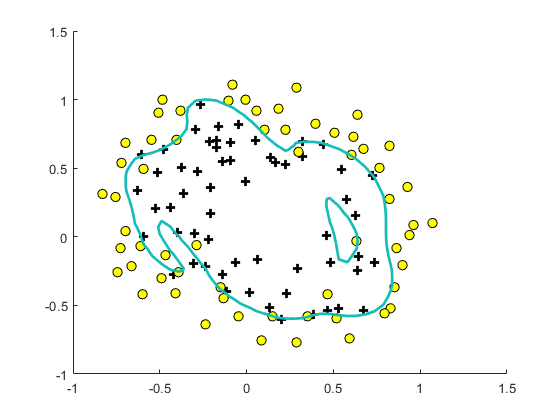

In [364]:
plotDecisionBoundary(theta_fmin, new_x, y)

## Neural networks